# 1. Introduction
We plan to illustrate how the data regarding the above tables affected passenger survival. We will raise questions like “Did the gender of passengers affect their survival?” “Did the location of the passengers’ cabins affect their survival?” We will organize this by giving an overview of the demographics of the passengers. We will them group them based on these certain demograpphics (sex, socioeconomic status, cabin number). Finally, we will show how these different groups were affected when the Titanic crashed/sunk. We will include graphs as well, which will help us answer the questions raised in the final report.

# 2. Set up

## 2.1 Import required modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 2.2 Read CSV into DataFrame




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic (1).csv to titanic (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['titanic (1).csv']))


In [ ]:
df=pd.read_csv('titanic (1).csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# 3. Data Cleaning

In [ ]:
print(df.isnull().any())

Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool


In [ ]:
print(df.isna().any())

Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool


#Gathering Information about the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Survival rate based on age and sex

In [ ]:
# Count of Total
df.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of People')

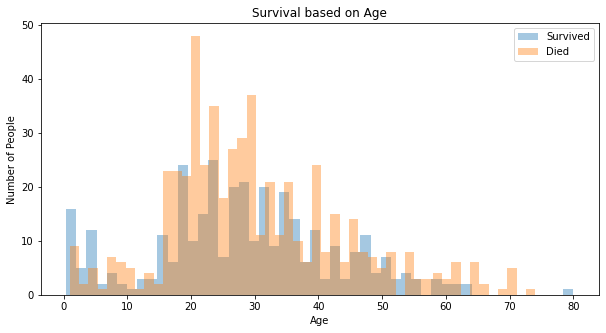

In [ ]:
survived = df[df.Survived == 1]
died = df[df.Survived == 0]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax = sns.distplot(survived.Age, kde=False, bins=50)
ax = sns.distplot(died.Age, kde=False, bins=50)
ax.legend(labels=['Survived','Died'])
ax.set_title('Survival based on Age')
ax.set_ylabel('Number of People')

In [ ]:
#Age Distribution
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df.Age, range(0, 101, 10), right=False, labels=age_labels)

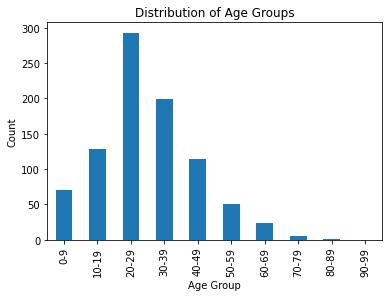

In [ ]:
df.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=12)
plt.ylabel('Count')
plt.xlabel('Age Group');

In [ ]:
# Mean for Surival Based on Sex
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64

In [ ]:
# Count of Survived Based on Sex
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,464
1,233,109


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

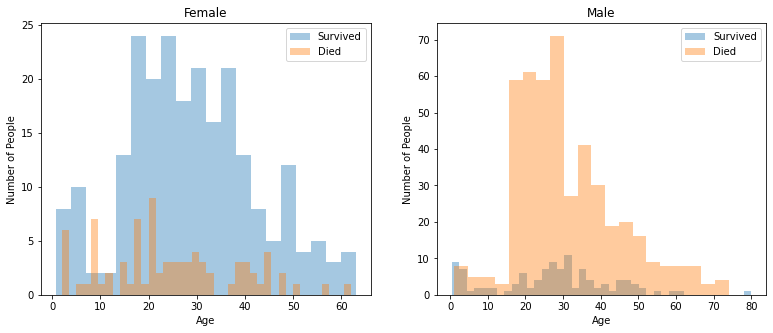

In [ ]:
survived = 1
not_survived = 2
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13, 5))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age, bins=20, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=40, ax = axes[0], kde =False)
ax.legend(labels=['Survived', 'Died'])
ax.set_ylabel('Number of People')
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age, bins=40, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age, bins=20, ax = axes[1], kde = False)
ax.legend(labels=['Survived', 'Died'])
ax.set_ylabel('Number of People')
_ = ax.set_title('Male')

# Survival rate based on Siblings/Spouse and Parents/Children Aboard



In [ ]:
# Relatives: Siblings/Spouses and/or Parents/Children

df['Relatives'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']
df.loc[df['Relatives'] > 0, 'not_alone'] = 0    # People who have relatives aboard
df.loc[df['Relatives'] == 0, 'not_alone'] = 1   # People who don't have any relatives aboard
df['not_alone'] = df['not_alone'].astype(int)

# Displays the number of people who either had relatives aboard or don't have any relatives aboard
df['not_alone'].value_counts()    # where 1 = no relatives aboard; 0 = relatives aboard



1    533
0    354
Name: not_alone, dtype: int64

In [ ]:
# Displays the people who survived and had at least one relative aboard
rel_survived = df.loc[(df['Relatives']>=1) & (df['Survived']==1)]        # 179 passengers

# Displays the people who survived and didn't have any relatives aboard
no_rel_survived = df.loc[(df['Relatives']==0) & (df['Survived']==1)]     # 163 passengers

# Displays the people died and had relatives aboard
rel_died = df.loc[(df['Relatives']>=1) & (df['Survived']==0)]            # 175 passengers

# Displays the people who died and didn't have any relatives aboard
no_rel_died = df.loc[(df['Relatives']==0) & (df['Survived']==0)]         # 370 passengers


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Dead')

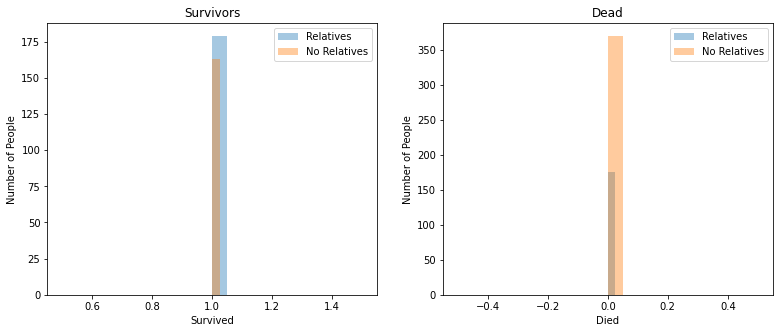

In [ ]:
# ADD: graph displaying survival rate of people in relation to whether they had relatives aboard
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13, 5))
ax = sns.distplot(rel_survived.Survived, bins=20, ax = axes[0], kde =False)
ax = sns.distplot(no_rel_survived.Survived, bins=40, ax = axes[0], kde =False)
ax.legend(labels=['Relatives', 'No Relatives'])
ax.set_ylabel('Number of People')
ax.set_title('Survivors')

ax = sns.distplot(rel_died.Survived, bins=40, ax = axes[1], kde = False)
ax = sns.distplot(no_rel_died.Survived, bins=20, ax = axes[1], kde = False)
ax.legend(labels=['Relatives', 'No Relatives'])
ax.set_xlabel('Died')
ax.set_ylabel('Number of People')
ax.set_title('Dead')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


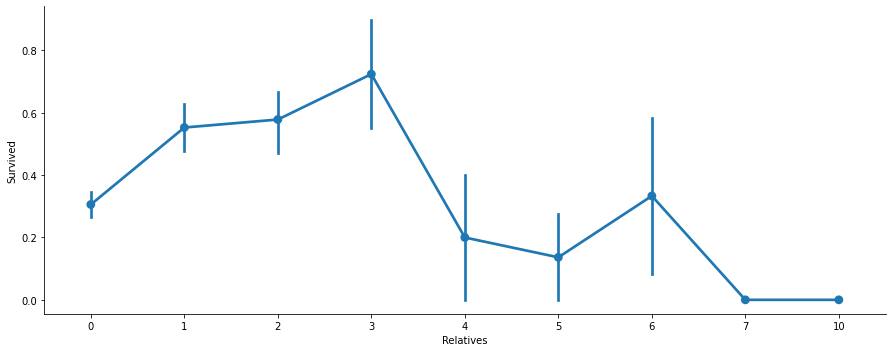

In [ ]:
# Distribution of people who survived and the number of relatives they had aboard
axes = sns.factorplot('Relatives','Survived', data=df, aspect = 2.5)

# Survival rate based on Pclass

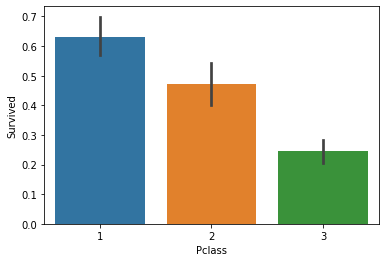

In [ ]:
sns.barplot(x='Pclass', y='Survived', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


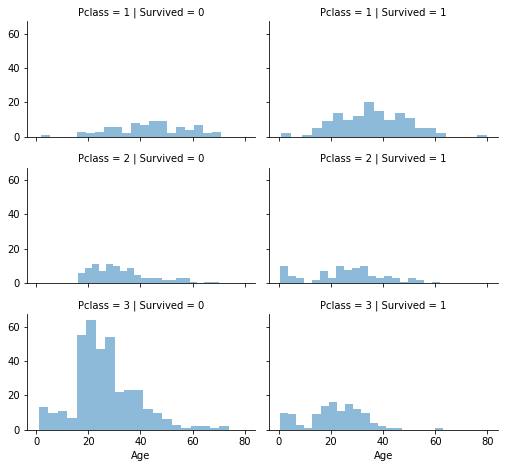

In [ ]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# sibings and survival

axes = sns.factorplot('siblings')

#Numerical Data

In [ ]:
pd.pivot_table(df, index = 'Survived', values = ['Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare'])

,Age,Fare,Parents/Children Aboard,Siblings/Spouses Aboard
Survived,,,,
0,30.138532,22.208584,0.332110,0.557798
1,28.408392,48.395408,0.464912,0.473684


In [ ]:
##For the above Code
###The average age of survivors is 28, so young people tend to survive more.
###People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived.
###If you had parents on board, you were more likely to survive, this exmaplining the lower age of surviving passangers.
###If you're a child and have sibilings, you have a lesser chance of surviving.

#Categorical Data

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df_cat = df[['Survived','Pclass','Sex','Name']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


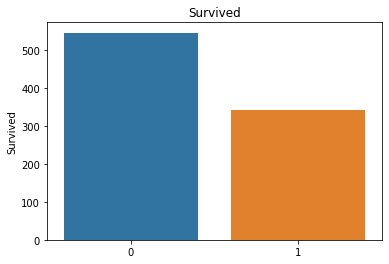

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


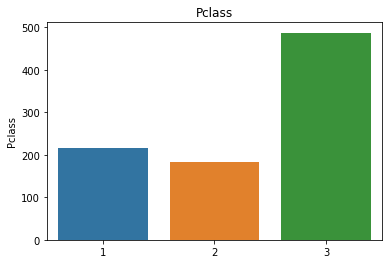

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


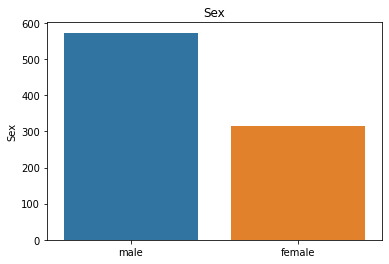

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


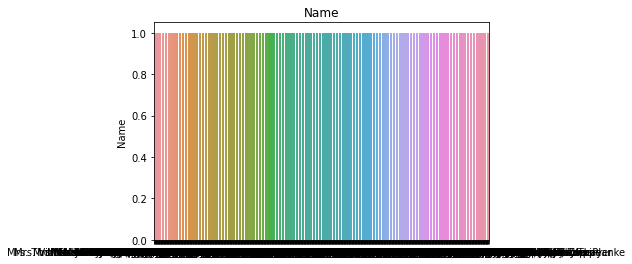

In [ ]:
for i in df_cat.columns:
  sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
  plt.show()

Pivot Tables

In [ ]:

print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
                     values = 'Age',aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex',
                     values = 'Age',aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Fare',
                     values = 'Age',aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  368
1         136  87  119

Sex       female  male
Survived              
0             81   464
1            233   109

Fare      0.0000    4.0125    5.0000    ...  262.3750  263.0000  512.3292
Survived                                ...                              
0             14.0       1.0       1.0  ...       NaN       2.0       NaN
1              1.0       NaN       NaN  ...       2.0       2.0       3.0

[2 rows x 248 columns]


In [ ]:
df[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

**Bar Plot for Fare**

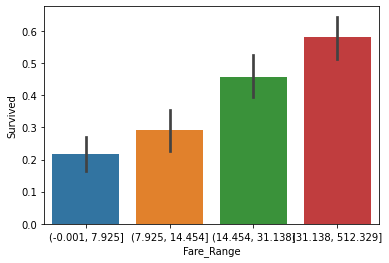

In [ ]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', data = df)

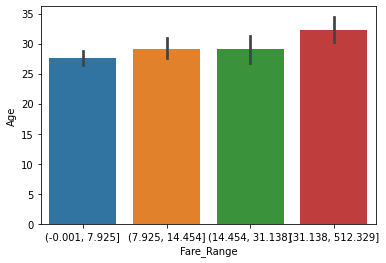

In [ ]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Age', data = df)

####Fare is the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins to get a clear idea. **It can be concluded that if a passenger paid a higher fare, the survival rate is more**